In [161]:
!pip install pyreadstat

In [162]:
import sqlite3
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

conn = sqlite3.connect('altmetrics.db')

COLUMN_NAME = 'Q1_Academic_Level'
# -----------------------------

query1 = f"""
    SELECT
        "{COLUMN_NAME}",
        COUNT(*) as total_responses
    FROM
        responses
    GROUP BY
        "{COLUMN_NAME}"
    ORDER BY
        total_responses DESC;
"""

print(f"--- Running SQL Query on column: \n \n {COLUMN_NAME} --- \n")

df = pd.read_sql_query(query1, conn)

print (df)

conn.close()


--- Running SQL Query on column: 
 
 Q1_Academic_Level --- 

        Q1_Academic_Level  total_responses
0  4th Year Undergraduate               68
1  2nd Year Undergraduate               56
2  1st Year Undergraduate               51
3  3rd Year Undergraduate               36
4                Master’s               19


--- Analyzing and plotting column: Q1_Academic_Level ---
Data loaded from SQL.

 Bar graph on Academic Levels 



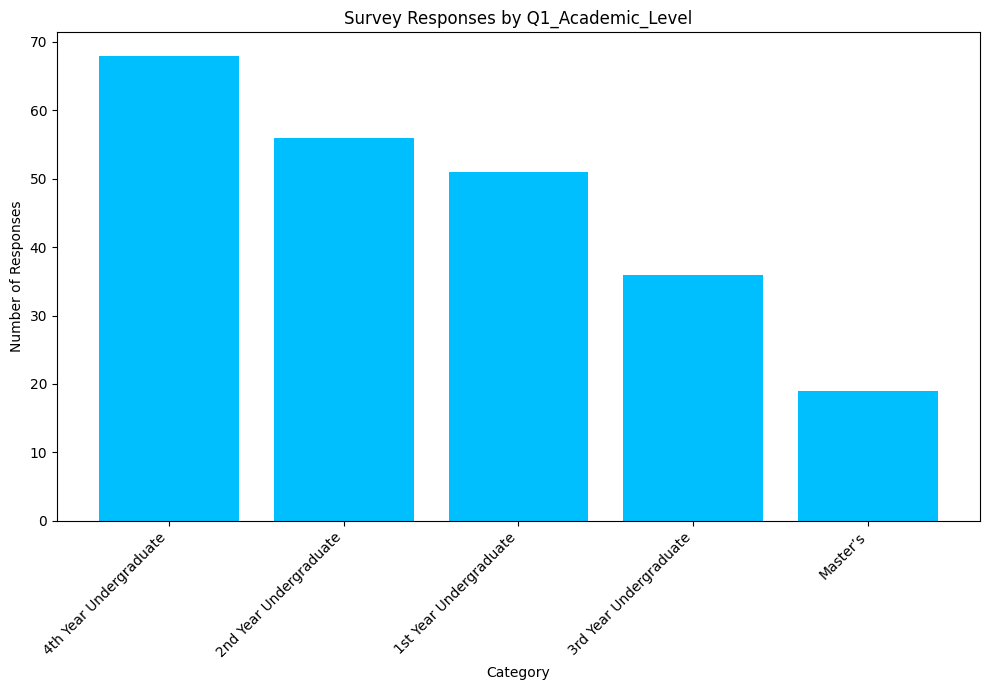


 Graph is saved as 'academic_level.png' in Colab files.


In [163]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


MY_COLUMN_NAME = 'Q1_Academic_Level'
# -----------------------------

print(f"--- Analyzing and plotting column: {MY_COLUMN_NAME} ---")

conn = sqlite3.connect('altmetrics.db')
query = f"""
    SELECT
        "{MY_COLUMN_NAME}",
        COUNT(*) as response_count
    FROM
        responses
    GROUP BY
        "{MY_COLUMN_NAME}"
    ORDER BY
        response_count DESC;
"""
df_plot = pd.read_sql_query(query, conn)
conn.close()
print("Data loaded from SQL.")

print("\n Bar graph on Academic Levels \n")

plt.figure(figsize=(10, 7))

plt.bar(df_plot[MY_COLUMN_NAME], df_plot['response_count'], color='deepskyblue')

plt.title(f'Survey Responses by {MY_COLUMN_NAME}')
plt.xlabel('Category')
plt.ylabel('Number of Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('academic_level.png')
plt.show()

print("\n Graph is saved as 'academic_level.png' in Colab files.")


In [164]:
import pandas as pd
import sqlite3
import sys

SAV_FILE = '1. Data Final Format.sav'
DB_FILE = 'altmetrics.db'
TABLE_NAME = 'responses'
# --------------

print(f"Reading SPSS file: '{SAV_FILE}'...")
df = pd.read_spss(SAV_FILE)
print("SPSS file read successfully.")

print("\n--- COLUMN NAMES ---")
for col in df.columns:
    print(col)
print("------------------------------\n")

conn = sqlite3.connect(DB_FILE)

print(f"Creating database '{DB_FILE}' and table '{TABLE_NAME}'...")
df.to_sql(TABLE_NAME, conn, if_exists='replace', index=False)


conn.close()

Reading SPSS file: '1. Data Final Format.sav'...
SPSS file read successfully.

--- COLUMN NAMES ---
Q1_Academic_Level
Q2_PriorExperience
Q3_ExperienceLevel
Q4_AltmetricsFamiliarity
Q5_AltmetricsUnderstanding
Q6_PlatformUseGoogleScholar
Q6_PlatformUse_JSTORScopus
Q6_PlatformUse_ResearchGate
Q6_PlatformUsePublisherWebsite
Q6_PlatformUse_PreprintServer
Q6_PlatformUse_AcademicBlog
Q6_PlatformUseSocialMedia
Q6_PlatformUse_OtherSpecified
Q7_AltmetricsAttention
Q8_TypesOutputPrimaryRes
Q8_TypesOutputDataCode
Q8_TypesOutputInstOut
Q8_TypesOutputPresentation
Q8_TypesOutputNotApp
Q8_TypesOutputOthers
Q9_NoticeIndicatorDownload
Q9_NoticeIndicatorSavesBookmark
Q9_NoticeIndicatorNews
Q9_NoticeIndicatorTwitter
Q9_NoticeIndicatorWiki
Q9_NoticeIndicatorPolicyDoc
Q10_PurposeofUseImpact
Q10_PurposeofUseRead
Q10_PurposeofUsePopularity
Q10_PurposeofUseAcaEvaluation
Q10_PurposeofUseOthers
Q11_SeekDUResearchers
Q12_MainChallengeUnderstand
Q12_MainChallengeInfo
Q12_MainChallengeCredibility
Q12_MainChallengeR

In [165]:
import pandas as pd
import sqlite3


print("--- Checking for Missing Data & Data Types (df.info()) ---")

conn = sqlite3.connect('altmetrics.db')
df_check = pd.read_sql_query("SELECT * FROM responses", conn)
conn.close()

df_check.info()

print("\n\n--- Reviewing First 5 Rows (df.head()) ---")
print(df_check.head())

--- Checking for Missing Data & Data Types (df.info()) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 47 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Q1_Academic_Level                   230 non-null    object
 1   Q2_PriorExperience                  230 non-null    object
 2   Q3_ExperienceLevel                  230 non-null    object
 3   Q4_AltmetricsFamiliarity            230 non-null    object
 4   Q5_AltmetricsUnderstanding          230 non-null    object
 5   Q6_PlatformUseGoogleScholar         230 non-null    object
 6   Q6_PlatformUse_JSTORScopus          230 non-null    object
 7   Q6_PlatformUse_ResearchGate         230 non-null    object
 8   Q6_PlatformUsePublisherWebsite      230 non-null    object
 9   Q6_PlatformUse_PreprintServer       230 non-null    object
 10  Q6_PlatformUse_AcademicBlog         230 non-null    object
 11 

--- Analyzing and Plotting Column: Q4_AltmetricsFamiliarity ---
Data loaded from SQL.

 Bar graph on responses for familiarity with Altmetrics 



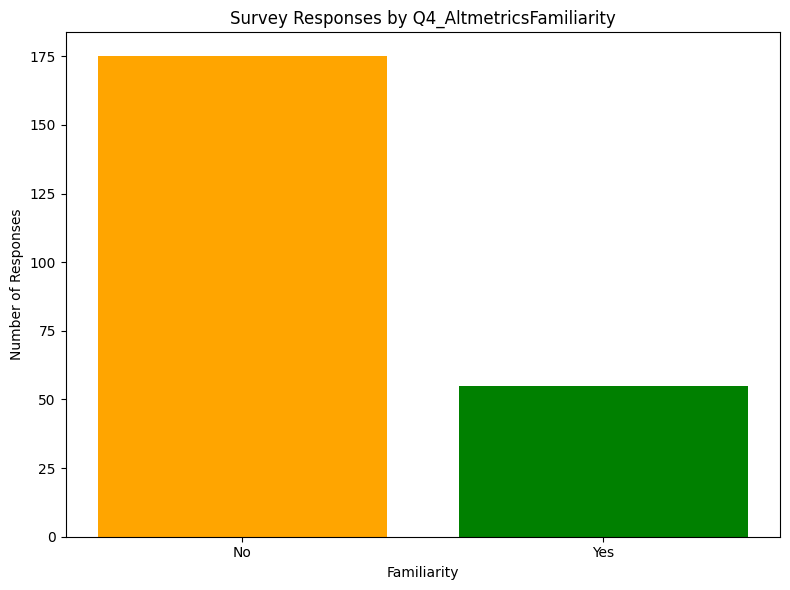


 Graph is saved as 'altmetrics_familiarity.png'


In [166]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

COLUMN_NAME = 'Q4_AltmetricsFamiliarity'
# --------------------------------------------------------

print(f"--- Analyzing and Plotting Column: {COLUMN_NAME} ---")

conn = sqlite3.connect('altmetrics.db')
query = f"""
    SELECT
        "{COLUMN_NAME}",
        COUNT(*) as response_count
    FROM
        responses
    GROUP BY
        "{COLUMN_NAME}"
    ORDER BY
        response_count DESC;
"""
df_plot = pd.read_sql_query(query, conn)
conn.close()
print("Data loaded from SQL.")

print("\n Bar graph on responses for familiarity with Altmetrics \n")


color_map = {
    'No': 'orange',
    'Yes': 'green'
}

color_list = df_plot[COLUMN_NAME].map(color_map).fillna('gray')
# -------------------------------------------------


plt.figure(figsize=(8, 6))


plt.bar(df_plot[COLUMN_NAME], df_plot['response_count'], color=color_list)
# -------------------------------------------------


plt.title(f'Survey Responses by {COLUMN_NAME}')
# -------------------------------------------------

plt.xlabel('Familiarity')
plt.ylabel('Number of Responses')
plt.xticks(rotation=0)
plt.tight_layout()


plt.savefig('altmetrics_familiarity.png')
plt.show()

print("\n Graph is saved as 'altmetrics_familiarity.png'")


--- Analyzing and Plotting pie chart for: Q13_NecessityAltmetricsEducation ---
Data loaded from SQL.

 Pie chart on responses for necessity of altmetrics education 



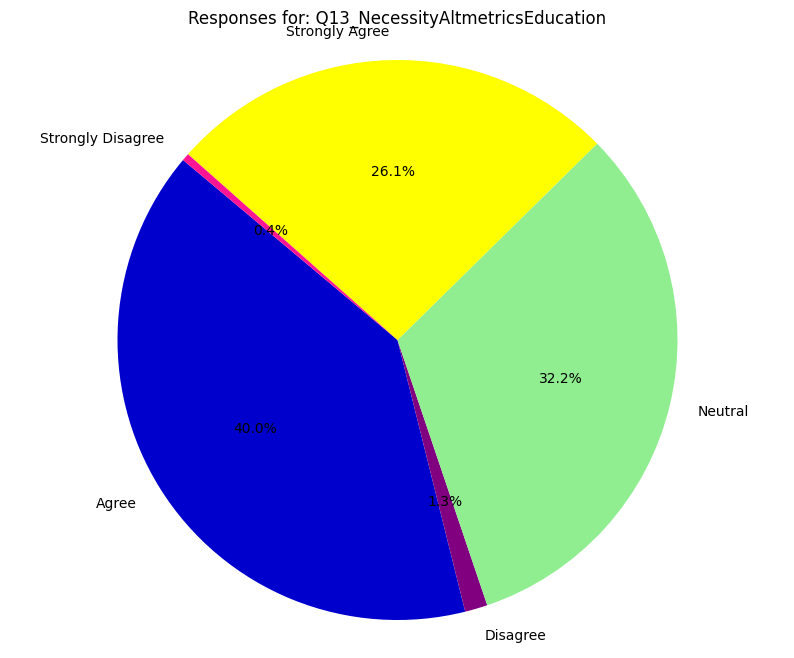


 Pie chart saved as 'necessity_altmetrics_ed.png'

--- Raw Data Used for Chart ---
  Q13_NecessityAltmetricsEducation  response_count
0                            Agree              92
1                         Disagree               3
2                          Neutral              74
3                   Strongly Agree              60
4                Strongly Disagree               1


In [167]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

MY_COLUMN_NAME = 'Q13_NecessityAltmetricsEducation'
# ------------------------------------------------

print(f"--- Analyzing and Plotting pie chart for: {MY_COLUMN_NAME} ---")

try:
    conn = sqlite3.connect('altmetrics.db')
    query = f"""
        SELECT
            "{MY_COLUMN_NAME}",
            COUNT(*) as response_count
        FROM
            responses
        GROUP BY
            "{MY_COLUMN_NAME}";
    """
    df_pie = pd.read_sql_query(query, conn)
    conn.close()
    print("Data loaded from SQL.")

    print("\n Pie chart on responses for necessity of altmetrics education \n")


    colors = ['mediumblue', 'purple', 'lightgreen', 'yellow', 'deeppink']

    plt.figure(figsize=(10, 8))

    plt.pie(
        df_pie['response_count'],
        labels=df_pie[MY_COLUMN_NAME],
        colors=colors,
        autopct='%1.1f%%',
        startangle=140
    )

    plt.title(f'Responses for: {MY_COLUMN_NAME}')
    plt.axis('equal')


    plt.savefig('necessity_altmetrics_ed.png')
    plt.show()

    print("\n Pie chart saved as 'necessity_altmetrics_ed.png'")


    print("\n--- Raw Data Used for Chart ---")
    print(df_pie)


except Exception as e:
    print(f"\n❌ ERROR: {e}")
    print("If you get an error, double-check the column name.")


Connected to altmetrics.db

 Bar graph on challenges in using Altmetrics 



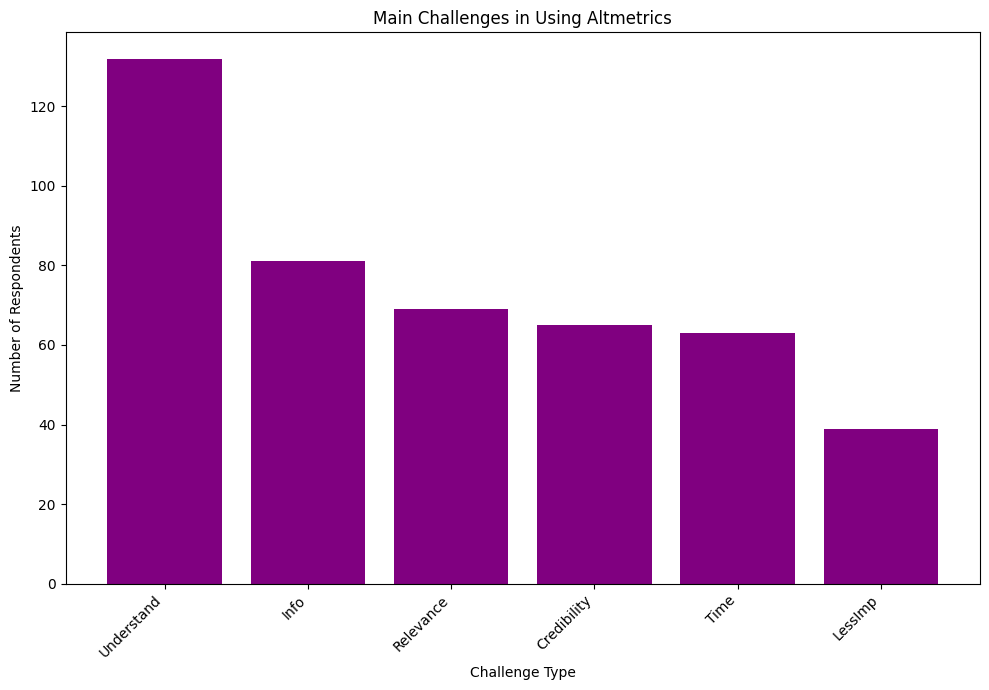


 Bar graph saved as 'challenges_chart.png'

--- Raw Data for Challenges --- 

     Challenge  Total
0   Understand    132
1         Info     81
3    Relevance     69
2  Credibility     65
4         Time     63
5      LessImp     39


In [168]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt


challenge_columns = [
    'Q12_MainChallengeUnderstand',
    'Q12_MainChallengeInfo',
    'Q12_MainChallengeCredibility',
    'Q12_MainChallengeRelevance',
    'Q12_MainChallengeTime',
    'Q12_MainChallengeLessImp'
]


conn = sqlite3.connect('altmetrics.db')
print("Connected to altmetrics.db")


queries = []
for col in challenge_columns:

    clean_label = col.replace('Q12_MainChallenge', '')

    query_part = f"""
        SELECT
            '{clean_label}' as Challenge,
            COUNT(*) as Total
        FROM responses
        WHERE "{col}" = 'Selected'
    """

    queries.append(query_part)

full_query = " UNION ALL ".join(queries)


df_challenges = pd.read_sql_query(full_query, conn)
conn.close()

df_challenges = df_challenges.sort_values(by='Total', ascending=False)


print("\n Bar graph on challenges in using Altmetrics \n")
plt.figure(figsize=(10, 7))

plt.bar(df_challenges['Challenge'], df_challenges['Total'], color='purple')

plt.title('Main Challenges in Using Altmetrics')
plt.xlabel('Challenge Type')
plt.ylabel('Number of Respondents')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.savefig('challenges_chart.png')
plt.show()

print("\n Bar graph saved as 'challenges_chart.png'")


print("\n--- Raw Data for Challenges --- \n")
print(df_challenges)

--- Analyzing and Plotting pie chart for: Q13_NecessityAltmetricsEducation ---
Data loaded from SQL.

 Pie chart on responses for necessity of altmetrics education 



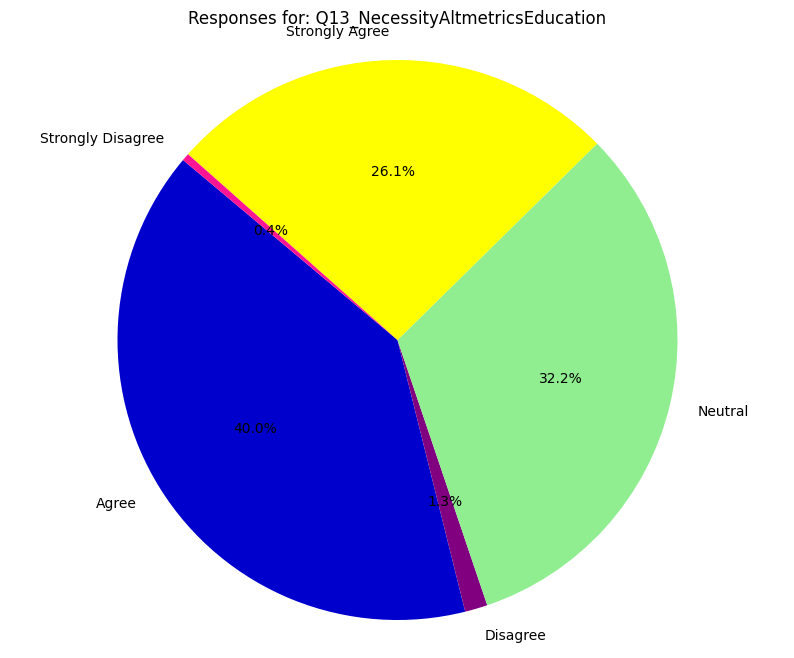


 Pie chart saved as 'necessity_altmetrics_ed.png'

--- Raw Data Used for Chart ---
  Q13_NecessityAltmetricsEducation  response_count
0                            Agree              92
1                         Disagree               3
2                          Neutral              74
3                   Strongly Agree              60
4                Strongly Disagree               1


In [169]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

MY_COLUMN_NAME = 'Q13_NecessityAltmetricsEducation'
# ------------------------------------------------

print(f"--- Analyzing and Plotting pie chart for: {MY_COLUMN_NAME} ---")

try:
    conn = sqlite3.connect('altmetrics.db')
    query = f"""
        SELECT
            "{MY_COLUMN_NAME}",
            COUNT(*) as response_count
        FROM
            responses
        GROUP BY
            "{MY_COLUMN_NAME}";
    """
    df_pie = pd.read_sql_query(query, conn)
    conn.close()
    print("Data loaded from SQL.")

    print("\n Pie chart on responses for necessity of altmetrics education \n")


    colors = ['mediumblue', 'purple', 'lightgreen', 'yellow', 'deeppink']

    plt.figure(figsize=(10, 8))

    plt.pie(
        df_pie['response_count'],
        labels=df_pie[MY_COLUMN_NAME],
        colors=colors,
        autopct='%1.1f%%',
        startangle=140
    )

    plt.title(f'Responses for: {MY_COLUMN_NAME}')
    plt.axis('equal')


    plt.savefig('necessity_altmetrics_ed.png')
    plt.show()

    print("\n Pie chart saved as 'necessity_altmetrics_ed.png'")


    print("\n--- Raw Data Used for Chart ---")
    print(df_pie)


except Exception as e:
    print(f"\n❌ ERROR: {e}")
    print("If you get an error, double-check the column name.")


Connected to altmetrics.db

 Running SQL query for 'Platform Use'...

 Graph showing the scholarly platforms the responders us frequently 



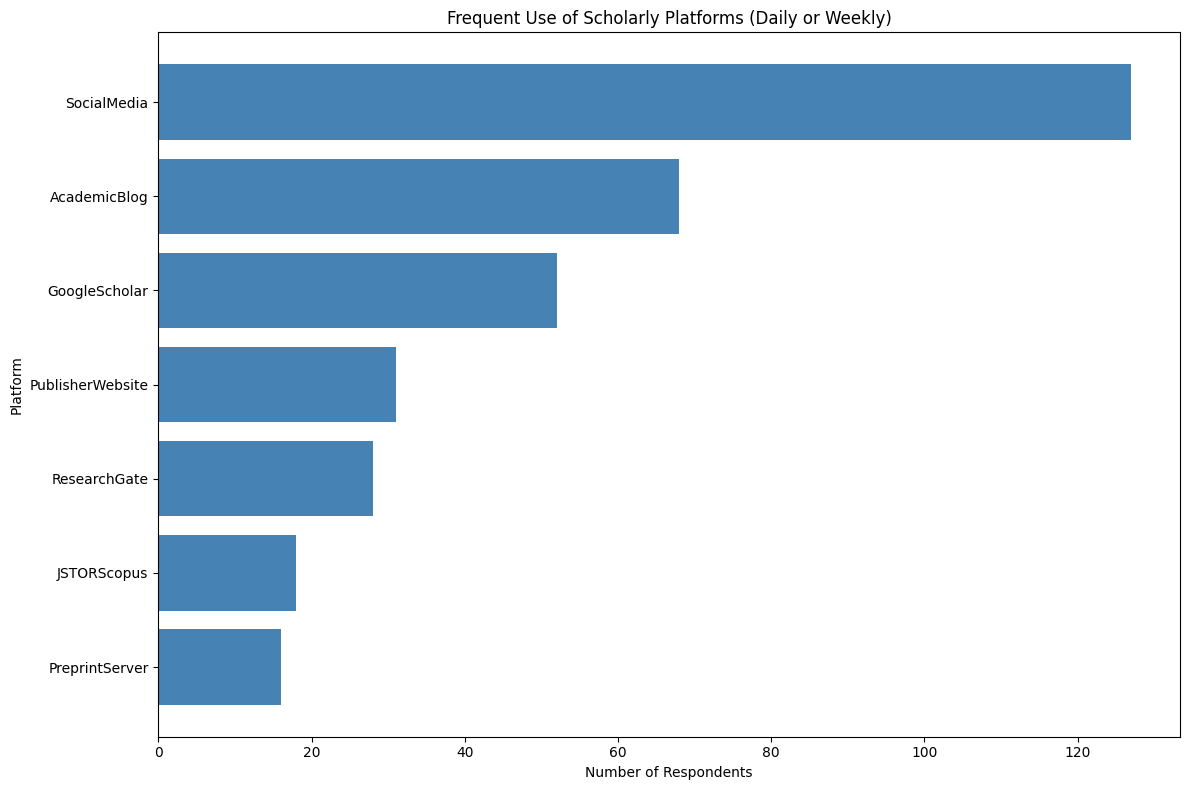


 Platform use chart created.

 Pie chart saved as 'platform_use_chart.png'

--- Raw Data for Platform Use --- 

           Platform  Frequent_Users
6       SocialMedia             127
5      AcademicBlog              68
0     GoogleScholar              52
3  PublisherWebsite              31
2      ResearchGate              28
1       JSTORScopus              18
4    PreprintServer              16


In [170]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

platform_columns = [
    'Q6_PlatformUseGoogleScholar',
    'Q6_PlatformUse_JSTORScopus',
    'Q6_PlatformUse_ResearchGate',
    'Q6_PlatformUsePublisherWebsite',
    'Q6_PlatformUse_PreprintServer',
    'Q6_PlatformUse_AcademicBlog',
    'Q6_PlatformUseSocialMedia'
]

conn = sqlite3.connect('altmetrics.db')
print("Connected to altmetrics.db")

queries = []
for col in platform_columns:

    clean_label = col.replace('Q6_PlatformUse', '').replace('_', '')

    query_part = f"""
        SELECT
            '{clean_label}' as Platform,
            COUNT(*) as Frequent_Users
        FROM responses
        WHERE "{col}" = 'Daily' OR "{col}" = 'Weekly'
    """
    queries.append(query_part)

full_query = " UNION ALL ".join(queries)

print("\n Running SQL query for 'Platform Use'...")
df_platforms = pd.read_sql_query(full_query, conn)
conn.close()

df_platforms = df_platforms.sort_values(by='Frequent_Users', ascending=True)

print("\n Graph showing the scholarly platforms the responders us frequently \n")
plt.figure(figsize=(12, 8))

plt.barh(df_platforms['Platform'], df_platforms['Frequent_Users'], color='steelblue')

plt.title('Frequent Use of Scholarly Platforms (Daily or Weekly)')
plt.xlabel('Number of Respondents')
plt.ylabel('Platform')
plt.tight_layout()

plt.savefig('platform_use_chart.png')
plt.show()

print("\n Platform use chart created.")

print("\n Pie chart saved as 'platform_use_chart.png'")

print("\n--- Raw Data for Platform Use --- \n")
print(df_platforms.sort_values(by='Frequent_Users', ascending=False)) # Show with highest on top

--- Analyzing Q4_AltmetricsFamiliarity vs. Q5_AltmetricsUnderstanding ---
Data loaded from SQL.

Data pivoted for plotting. 

Bar graph on responders' understanding level and familiarity with Altmetrics 



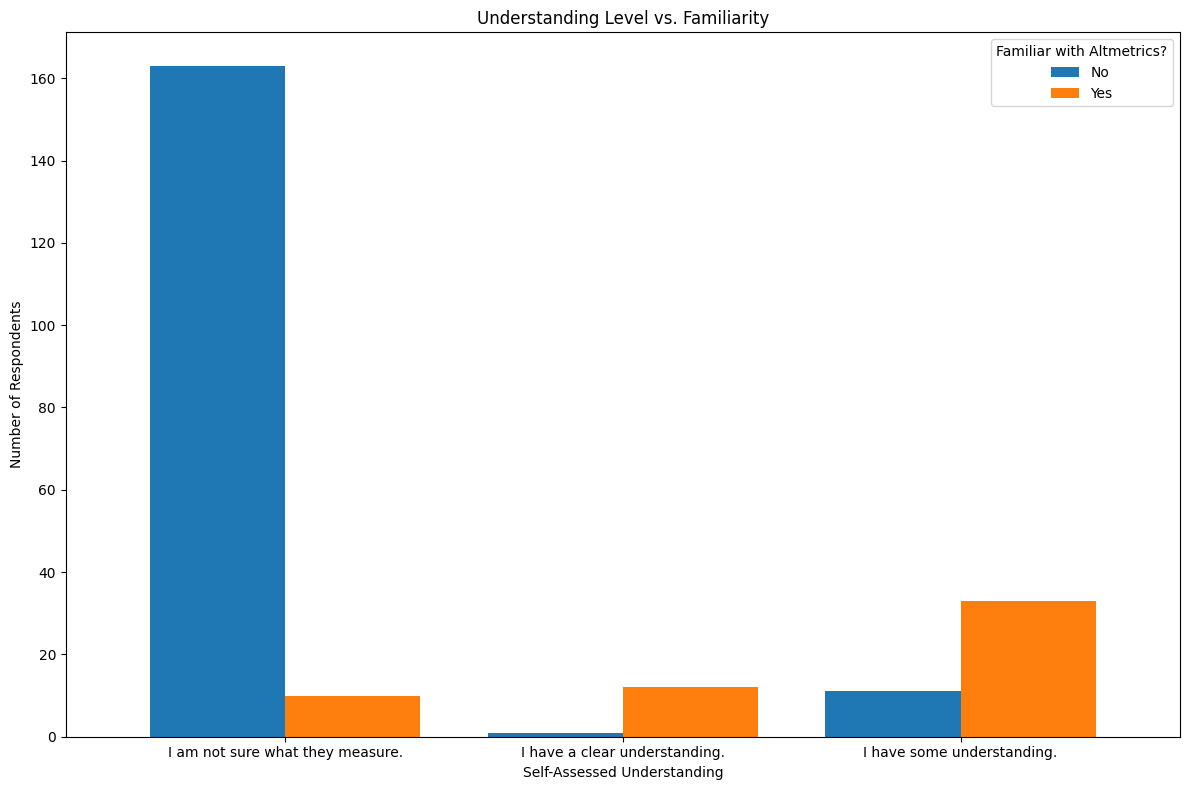


 Grouped chart saved as 'understanding_level_familiarity_chart.png'

--- Pivoted Data Used for Chart --- 

Q4_AltmetricsFamiliarity           No  Yes
Q5_AltmetricsUnderstanding                
I am not sure what they measure.  163   10
I have a clear understanding.       1   12
I have some understanding.         11   33


In [171]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

FAMILIARITY_COL = 'Q4_AltmetricsFamiliarity'
UNDERSTANDING_COL = 'Q5_AltmetricsUnderstanding'
# ------------------------------------------------

print(f"--- Analyzing {FAMILIARITY_COL} vs. {UNDERSTANDING_COL} ---")

try:
    conn = sqlite3.connect('altmetrics.db')

    query = f"""
        SELECT
            "{FAMILIARITY_COL}",
            "{UNDERSTANDING_COL}",
            COUNT(*) as total
        FROM
            responses
        GROUP BY
            "{FAMILIARITY_COL}", "{UNDERSTANDING_COL}"
    """

    df_compare = pd.read_sql_query(query, conn)
    conn.close()
    print("Data loaded from SQL.\n")

    df_pivot = df_compare.pivot(
        index=UNDERSTANDING_COL,
        columns=FAMILIARITY_COL,
        values='total'
    )

    df_pivot = df_pivot.fillna(0)

    df_pivot = df_pivot.sort_index()

    print("Data pivoted for plotting. \n")


    print("Bar graph on responders' understanding level and familiarity with Altmetrics \n")

    ax = df_pivot.plot(
        kind='bar',
        figsize=(12, 8),
        width=0.8,
        color=['#1f77b4', '#ff7f0e']
    )

    plt.title(f'Understanding Level vs. Familiarity')
    plt.ylabel('Number of Respondents')
    plt.xlabel('Self-Assessed Understanding')
    plt.xticks(rotation=0)
    plt.legend(title='Familiar with Altmetrics?')
    plt.tight_layout()


    plt.savefig('word_cloud_chart.png')
    plt.show()
    print("\n Grouped chart saved as 'understanding_level_familiarity_chart.png'")


    print("\n--- Pivoted Data Used for Chart --- \n")
    print(df_pivot)


except Exception as e:
    print(f"\n❌ ERROR: {e}")
    print("If you get an error, double-check the column names.")

In [172]:
import sqlite3
import pandas as pd
from scipy.stats import chi2_contingency

COL_1 = 'Q1_Academic_Level'
COL_2 = 'Q4_AltmetricsFamiliarity'
# ------------------------------------------------

print(f"--- Running Statistical Test (Chi-Square) on: ---")
print(f"    {COL_1} vs. {COL_2}")

try:
    conn = sqlite3.connect('altmetrics.db')

    query = f"""
        SELECT
            "{COL_1}",
            "{COL_2}",
            COUNT(*) as total
        FROM
            responses
        GROUP BY
            "{COL_1}", "{COL_2}"
    """

    df_test = pd.read_sql_query(query, conn)
    conn.close()

    contingency_table = pd.crosstab(df_test[COL_1], df_test[COL_2], values=df_test['total'], aggfunc='sum')

    contingency_table = contingency_table.fillna(0)

    print("\n--- Contingency Table (The Data) ---")
    print(contingency_table)

    chi2, p_value, dof, expected = chi2_contingency(contingency_table)

    print("\n--- Test Results ---")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p_value}")
    print(f"Degrees of Freedom: {dof}")

    if p_value < 0.05:
        print("\n \n \n Interpretation: The p-value is LESS than 0.05.")
        print("This means there IS a statistically significant relationship between the two variables!")
    else:
        print("\n \n \n Interpretation: The p-value is GREATER than 0.05.")
        print("This means there is NO statistically significant relationship between the two variables.")

except Exception as e:
    print(f"\n❌ ERROR: {e}")

--- Running Statistical Test (Chi-Square) on: ---
    Q1_Academic_Level vs. Q4_AltmetricsFamiliarity

--- Contingency Table (The Data) ---
Q4_AltmetricsFamiliarity  No  Yes
Q1_Academic_Level                
1st Year Undergraduate    45    6
2nd Year Undergraduate    51    5
3rd Year Undergraduate    32    4
4th Year Undergraduate    41   27
Master’s                   6   13

--- Test Results ---
Chi-Square Statistic: 44.298083699189405
P-Value: 5.563221674099999e-09
Degrees of Freedom: 4

 
 
 Interpretation: The p-value is LESS than 0.05.
This means there IS a statistically significant relationship between the two variables!


In [173]:
import sqlite3
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

print("--- Running Predictive Model (Logistic Regression) with Balanced Weights ---")

try:
    FEATURE_COLS = [
        'Q6_PlatformUseGoogleScholar',
        'Q6_PlatformUse_JSTORScopus',
        'Q6_PlatformUse_ResearchGate',
        'Q6_PlatformUsePublisherWebsite',
        'Q6_PlatformUse_PreprintServer',
        'Q6_PlatformUse_AcademicBlog',
        'Q6_PlatformUseSocialMedia'
    ]


    TARGET_COL = 'Q4_AltmetricsFamiliarity'

    conn = sqlite3.connect('altmetrics.db')
    df_all = pd.read_sql_query(f'SELECT * FROM responses', conn)
    conn.close()

    X = df_all[FEATURE_COLS]
    y = df_all[TARGET_COL]

    X = pd.get_dummies(X, drop_first=True)

    le = LabelEncoder()
    y = le.fit_transform(y)

    print("\n Data successfully pre-processed for machine learning.")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = LogisticRegression(max_iter=1000, class_weight='balanced')
    # -----------------------

    model.fit(X_train, y_train)
    print("\n Model trained successfully.")


    y_pred = model.predict(X_test)


    accuracy = accuracy_score(y_test, y_pred)
    print("\n--- Model Results (Balanced) ---")
    print(f"Model Accuracy: {accuracy * 100:.2f}%")

    print("\n--- Classification Report (Balanced) ---")

    print(classification_report(y_test, y_pred, target_names=le.classes_))

except Exception as e:
    print(f"\n❌ ERROR: {e}")

--- Running Predictive Model (Logistic Regression) with Balanced Weights ---

 Data successfully pre-processed for machine learning.

 Model trained successfully.

--- Model Results (Balanced) ---
Model Accuracy: 59.42%

--- Classification Report (Balanced) ---
              precision    recall  f1-score   support

          No       0.80      0.62      0.70        53
         Yes       0.29      0.50      0.36        16

    accuracy                           0.59        69
   macro avg       0.55      0.56      0.53        69
weighted avg       0.68      0.59      0.62        69



--- Generating Word Cloud for: Q15_AnyComments ---

 Text data loaded successfully.

 Word cloud generated. 



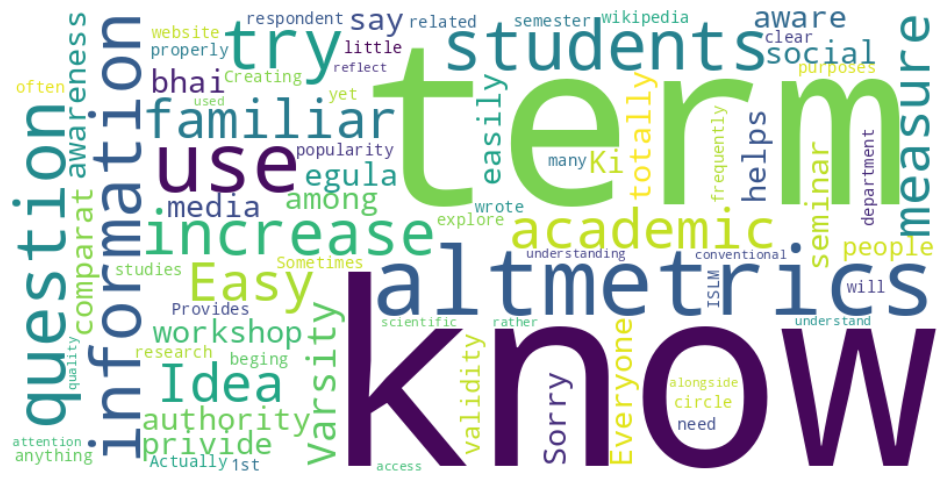


 Word Cloud saved as 'word_cloud.png'


In [174]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

TEXT_COLUMN = 'Q15_AnyComments'

print(f"--- Generating Word Cloud for: {TEXT_COLUMN} ---")

try:

    conn = sqlite3.connect('altmetrics.db')

    query = f"""
        SELECT
            "{TEXT_COLUMN}"
        FROM
            responses
    """

    df_text = pd.read_sql_query(query, conn)
    conn.close()

    text_data = " ".join(
        str(comment) for comment in df_text[TEXT_COLUMN] if pd.notna(comment)
    )

    if not text_data.strip():
        print("\n❌ No text data found in this column. Cannot generate word cloud.")
    else:
        print("\n Text data loaded successfully.")

        custom_stopwords = set(STOPWORDS)
        custom_stopwords.update([
            "no", "comments", "na", "n", "a", "nothing",
            "thank", "you", "thanks", "comment", "thoughts"
        ])

        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            stopwords=custom_stopwords,
            colormap='viridis'
        ).generate(text_data)

        print("\n Word cloud generated. \n")


        plt.figure(figsize=(12, 8))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')

        plt.savefig('my_word_cloud.png')
        plt.show()

        print("\n Word Cloud saved as 'word_cloud.png'")

except Exception as e:
    print(f"\n❌ ERROR: {e}")